In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import cv2
from tensorflow.keras import backend
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, load_model
from keras.layers import Conv2D, Input, MaxPooling2D, BatchNormalization, Dense, Flatten
print(tf.__version__)

2.1.0


Using TensorFlow backend.


In [ ]:
# tf.disable_v2_behavior()

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

In [4]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [5]:
trainX = trainX/255.0
testX = testX/255.0

In [7]:
#input tensor initialisation
input_img = keras.layers.Input((28, 28, 1), name = "img")
n_filters = 16

In [11]:
# def make_model(input_img, n_filters = 16):
c1 = keras.layers.Conv2D(n_filters, (3,3), padding='same', activation='relu', input_shape = (28,28,1))(input_img)
p1 = keras.layers.MaxPooling2D((2,2))(c1)

c2 = keras.layers.Conv2D(n_filters*4, (3,3), padding='same', activation='relu')(p1)
p2 = keras.layers.MaxPooling2D((2,2))(c2)

c3 = keras.layers.Conv2D(n_filters*4, (3,3), padding='same', activation='relu')(p2)
flat = keras.layers.Flatten()
flattened = flat(c3)
d1 = keras.layers.Dense(64, activation='relu')(flattened)
d2 = keras.layers.Dense(10, activation='softmax')(d1)
model = Model(inputs=[input_img], outputs=[d2])
model.compile(optimizer = 'Adam', loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [12]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        9280      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0   

In [13]:
history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 24s 404us/sample - loss: 0.4135 - accuracy: 0.8503 - val_loss: 0.3177 - val_accuracy: 0.8857
Epoch 2/10
60000/60000 [==============================] - 25s 423us/sample - loss: 0.2698 - accuracy: 0.9013 - val_loss: 0.2666 - val_accuracy: 0.9035
Epoch 3/10
60000/60000 [==============================] - 26s 429us/sample - loss: 0.2250 - accuracy: 0.9159 - val_loss: 0.2627 - val_accuracy: 0.9005
Epoch 4/10
60000/60000 [==============================] - 26s 427us/sample - loss: 0.1934 - accuracy: 0.9277 - val_loss: 0.2398 - val_accuracy: 0.9160
Epoch 5/10
60000/60000 [==============================] - 25s 422us/sample - loss: 0.1683 - accuracy: 0.9374 - val_loss: 0.2530 - val_accuracy: 0.9097
Epoch 6/10
60000/60000 [==============================] - 25s 421us/sample - loss: 0.1442 - accuracy: 0.9452 - val_loss: 0.2438 - val_accuracy: 0.9169
Epoch 7/10
60000/60000 [====================

60000/60000 - 6s - loss: 0.0640 - accuracy: 0.9760


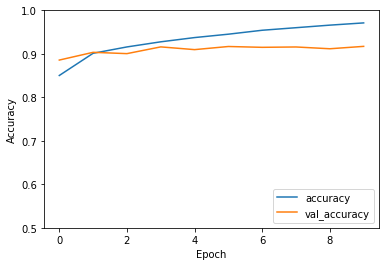

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(trainX, trainY, verbose=2)
